___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

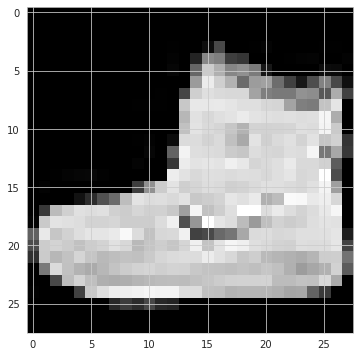

In [ ]:
plt.imshow(X_train[0],cmap='gray');

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train[0]

9

In [ ]:
classes[9]

'Ankle boot'

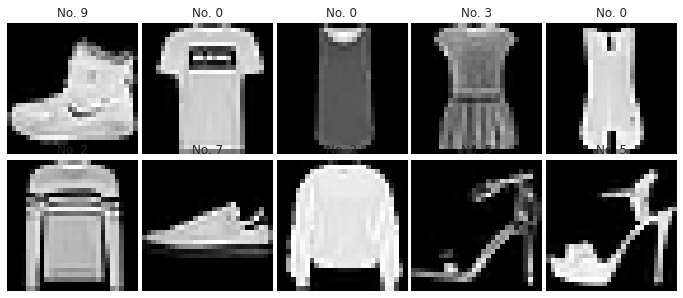

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.min()

0.0

In [ ]:
X_train.max()

1.0

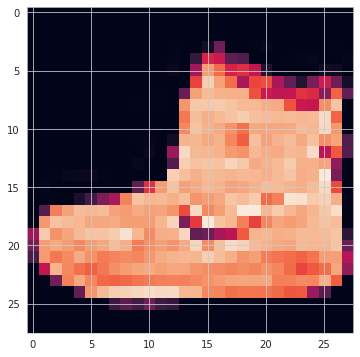

In [ ]:
plt.imshow(X_train[0]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[8]

5

In [ ]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16128)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               4129024   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                      

In [ ]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4043 - accuracy: 0.8595 - val_loss: 0.3197 - val_accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3061 - accuracy: 0.8937 - val_loss: 0.3040 - val_accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2900 - accuracy: 0.9022 - val_loss: 0.3080 - val_accuracy: 0.8938
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2824 - accuracy: 0.9028 - val_loss: 0.3215 - val_accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2838 - accuracy: 0.9036 - val_loss: 0.2986 - val_accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2827 - accuracy: 0.9043 - val_loss: 0.3352 - val_accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2813 - accuracy: 0.9046 - val_loss: 0.3003 - val_accur

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.404,0.860,0.320,0.884
1,0.306,0.894,0.304,0.896
2,0.290,0.902,0.308,0.894
3,0.282,0.903,0.322,0.900
4,0.284,0.904,0.299,0.896


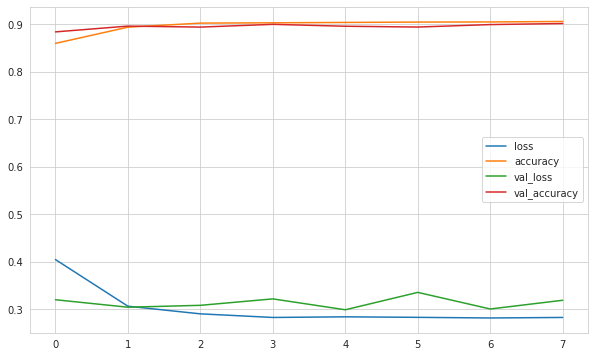

In [ ]:
summary.plot();

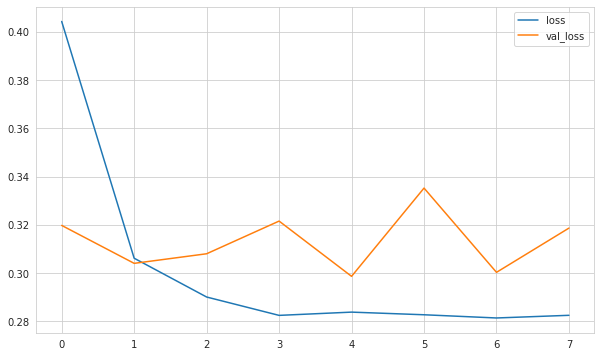

In [ ]:
summary[["loss", "val_loss"]].plot();

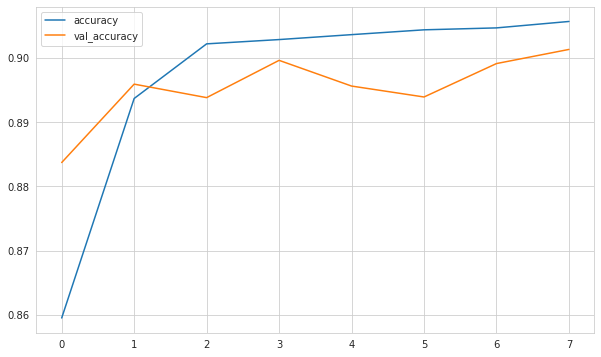

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8956


[0.29860299825668335, 0.8956000208854675]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29860299825668335
Test accuracy: 0.8956000208854675


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.3010696e-06, 8.1138495e-07, 2.8078859e-06, ..., 5.3603482e-03,
        1.3691782e-05, 9.9391079e-01],
       [1.4361489e-06, 3.1366198e-15, 9.9996483e-01, ..., 3.1258334e-15,
        2.3744570e-10, 8.9475749e-15],
       [3.5206426e-07, 9.9999440e-01, 2.9456044e-09, ..., 3.3333933e-08,
        5.9520129e-08, 3.3237590e-10],
       ...,
       [5.5929609e-06, 2.4339526e-12, 2.0719956e-07, ..., 2.3331476e-10,
        9.9954057e-01, 4.3990211e-12],
       [5.6537529e-06, 9.9968910e-01, 3.3097632e-07, ..., 6.1001862e-07,
        5.8109993e-07, 5.1483653e-08],
       [4.9785161e-03, 1.3414716e-03, 6.5438105e-03, ..., 1.1629010e-01,
        2.0749060e-02, 3.4611829e-02]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([1.3010696e-06, 8.1138495e-07, 2.8078859e-06, 2.1765266e-06,
       1.6318976e-06, 7.0413819e-04, 2.2030083e-06, 5.3603482e-03,
       1.3691782e-05, 9.9391079e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.79      0.83      1000
           3       0.90      0.89      0.89      1000
           4       0.77      0.88      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.72      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[836   0  14  29   9   2 107   0   3   0]
 [  2 969   3  18   3   0   3   0   2   0]
 [ 17   1 787   8 115   0  71   0   1   0]
 [ 12   7   5 888  52   0  36   0   0   0]
 [  1   0  34  17 882   0  66   0   0   0]
 [  0   0   0   0   0 971   0  26   1   2]
 [114   1  54  25  77   0 720   0   9   0]
 [  0   0   0   0   0   7   0 983   0  10]
 [  0   0   3   6   4   1   8   3 975   0]
 [  0   0   1   0   0   6   0  48   0 945]]


In [ ]:
(y_test != y_pred).sum()

1044

## Prediction

In [ ]:
samples=[X_test[0], X_test[1], X_test[2]]

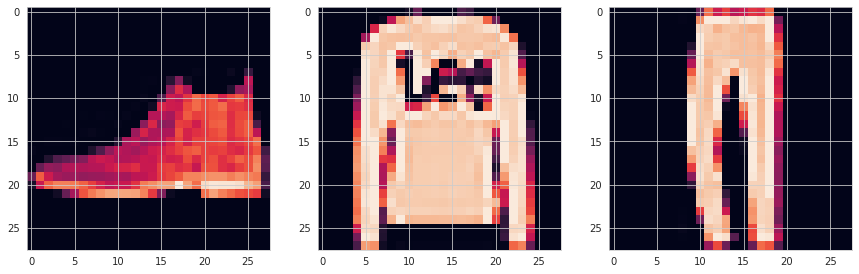

In [ ]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [ ]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
samples.shape

(3, 28, 28, 1)

In [ ]:
pred_prob = model.predict(samples)
pred_prob

1/1 [==============================] - 0s 14ms/step


array([[1.30107094e-06, 8.11385007e-07, 2.80788640e-06, 2.17652678e-06,
        1.63189623e-06, 7.04138307e-04, 2.20300421e-06, 5.36034303e-03,
        1.36917834e-05, 9.93910909e-01],
       [1.43614761e-06, 3.13660747e-15, 9.99964833e-01, 6.25008312e-08,
        1.20170571e-05, 1.04189233e-13, 2.15562395e-05, 3.12582157e-15,
        2.37445702e-10, 8.94757494e-15],
       [3.52063921e-07, 9.99994397e-01, 2.94560443e-09, 3.83501538e-06,
        1.22702284e-06, 2.35299709e-08, 7.46381659e-08, 3.33339329e-08,
        5.95201293e-08, 3.32375905e-10]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
for i in y_test[:3]:
    print(classes[i])

Ankle boot
Pullover
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___